### tf.image 
#### `tf.image.resize` API 详解

`tf.image.resize` 是 TensorFlow 中用于调整图像大小的函数。它能够根据给定的大小对图像进行上采样或下采样。以下是该 API 的详细解释和用法示例。

##### `tf.image.resize` 函数定义

```python
tf.image.resize(
    images,
    size,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)
```

1. **images**:
   - 输入的图像，必须是一个 4D 张量，形状为 `[batch, height, width, channels]`。

2. **size**:
   - 一个整数列表或张量，包含目标大小 `[new_height, new_width]`。

3. **method**（可选）:
   - 用于调整图像大小的方法，有以下几种选项：
     - `tf.image.ResizeMethod.BILINEAR`：双线性插值法（默认）。
     - `tf.image.ResizeMethod.NEAREST_NEIGHBOR`：最近邻插值法。
     - `tf.image.ResizeMethod.BICUBIC`：双三次插值法。
     - `tf.image.ResizeMethod.AREA`：面积插值法。

4. **preserve_aspect_ratio**（可选）:
   - 一个布尔值，是否保持纵横比。如果为 True，则输出图像大小将保持与输入图像相同的纵横比。

5. **antialias**（可选）:
   - 一个布尔值，如果为 True，将在下采样时应用抗锯齿滤波。仅在使用 `tf.image.ResizeMethod.BILINEAR` 或 `tf.image.ResizeMethod.BICUBIC` 时适用。

6. **name**（可选）:
   - 操作的名称（用于命名操作，通常可以忽略）。



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


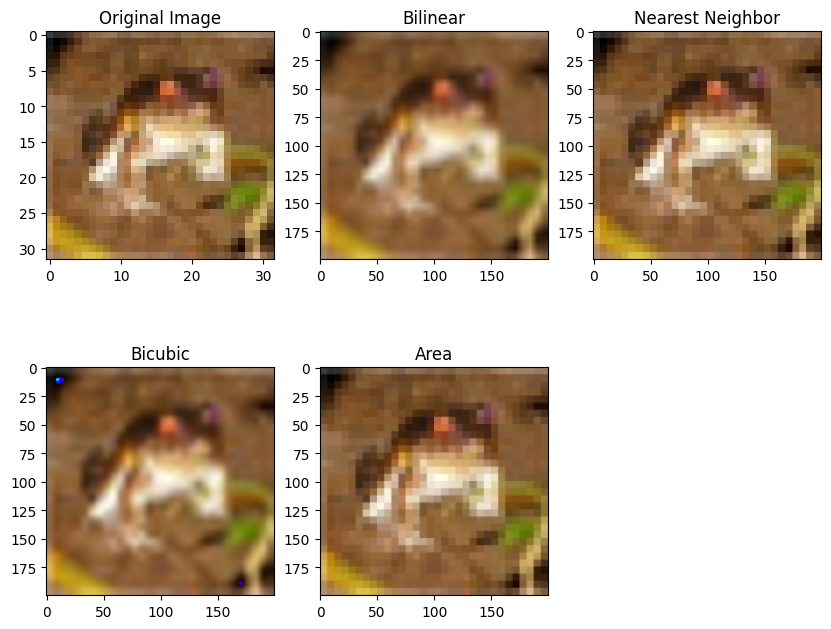

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载 CIFAR-10 数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 选择一张图片
image = x_train[0]

# 转换为4D张量 (batch_size, height, width, channels)
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, 0)  # 添加批次维度

# 定义目标大小
new_size = [200, 200]

# 调整图像大小
resized_image_bilinear = tf.image.resize(image_tensor, new_size, method=tf.image.ResizeMethod.BILINEAR)
resized_image_nearest = tf.image.resize(image_tensor, new_size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
resized_image_bicubic = tf.image.resize(image_tensor, new_size, method=tf.image.ResizeMethod.BICUBIC)
resized_image_area = tf.image.resize(image_tensor, new_size, method=tf.image.ResizeMethod.AREA)

# 转换为 numpy 数组以便可视化
resized_image_bilinear = resized_image_bilinear.numpy().squeeze()
resized_image_nearest = resized_image_nearest.numpy().squeeze()
resized_image_bicubic = resized_image_bicubic.numpy().squeeze()
resized_image_area = resized_image_area.numpy().squeeze()

# 可视化原始图像和调整大小后的图像
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(2, 3, 2)
plt.title("Bilinear")
plt.imshow(resized_image_bilinear.astype(np.uint8))

plt.subplot(2, 3, 3)
plt.title("Nearest Neighbor")
plt.imshow(resized_image_nearest.astype(np.uint8))

plt.subplot(2, 3, 4)
plt.title("Bicubic")
plt.imshow(resized_image_bicubic.astype(np.uint8))

plt.subplot(2, 3, 5)
plt.title("Area")
plt.imshow(resized_image_area.astype(np.uint8))

plt.show()
